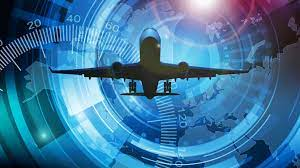

# Flying Through The Years

# Overview

This Project Analyzes aviation data accidents from 1962-2023 about civil aviation accidents and selected incidents in the United States and international waters. The project will focus more on airplane accidents.The aviation comapanies that make airplanes can use this analysis to improve and or add more engines to their airplanes for more safer flying and reduction of injury incidents. 

# Business Understanding

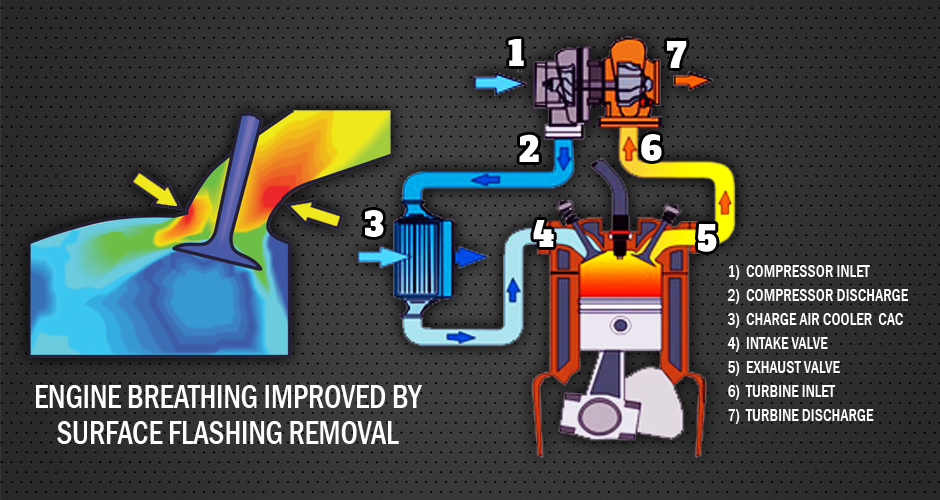

Aviation companies in America can reduce accidents and incidents through improving there airplane engines or adding additionally engines. Doing so will reduce incidents in the air and or crashing. Using Aviation data I'll describe patterns of accidents and incidents through the years on how many engines each plane had in each injury incident.

# Data Understanding

The Aviation accident database has a long list of years from the 1960's to 2023 about the accidents and how many engines they have with the injury reports per incident.

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
aviation_data = pd.read_csv("Aviation_Data.csv", low_memory=False)

In [3]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation_data['Accident Date'] =  pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Accident Date'].describe()

count                            88889
mean     1999-09-17 17:13:39.354476032
min                1948-10-24 00:00:00
25%                1989-01-15 00:00:00
50%                1998-07-18 00:00:00
75%                2009-07-01 00:00:00
max                2022-12-29 00:00:00
Name: Accident Date, dtype: object

### Number of Engines data

In [6]:
aviation_data['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

### Total Number of Injury Severity Incidents data

In [7]:
aviation_data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

## Data Preperation

### Data cleaning

After getting the data for the number of engines and injury severity incidents data and accident dates, I will be focusing on those columns

In [8]:
#These columns will be the main focus, Number of Engines, Injury Severity and Accident Date
aviation_data.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Accident Date
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,88889
mean,1.146585,0.647855,0.279881,0.357061,5.325440,1999-09-17 17:13:39.354476032
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948-10-24 00:00:00
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1989-01-15 00:00:00
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1998-07-18 00:00:00
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2009-07-01 00:00:00
max,8.000000,349.000000,161.000000,380.000000,699.000000,2022-12-29 00:00:00
std,0.446510,5.485960,1.544084,2.235625,27.913634,NaN


In [9]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Accident Date'],
      dtype='object')

In [10]:
#These 3 columns will be the main focus
aviation_data = aviation_data[['Event.Date', 'Injury.Severity', 'Number.of.Engines']]


In [11]:
aviation_data

,Event.Date,Injury.Severity,Number.of.Engines
0,1948-10-24,Fatal(2),1.0
1,1962-07-19,Fatal(4),1.0
2,1974-08-30,Fatal(3),1.0
3,1977-06-19,Fatal(2),1.0
4,1979-08-02,Fatal(1),NaN
...,...,...,...
90343,2022-12-26,Minor,NaN
90344,2022-12-26,NaN,NaN
90345,2022-12-26,Non-Fatal,1.0
90346,2022-12-26,NaN,NaN


In [18]:
# I will drop NaN from the dataset
aviation_data = aviation_data.dropna()

In [19]:
aviation_data

,Event.Date,Injury.Severity,Number.of.Engines
0,1948-10-24,Fatal(2),1.0
1,1962-07-19,Fatal(4),1.0
2,1974-08-30,Fatal(3),1.0
3,1977-06-19,Fatal(2),1.0
5,1979-09-17,Non-Fatal,2.0
...,...,...,...
90328,2022-12-13,Non-Fatal,2.0
90332,2022-12-14,Non-Fatal,1.0
90335,2022-12-15,Non-Fatal,2.0
90336,2022-12-16,Minor,1.0


In [20]:
aviation_data.head(10)

,Event.Date,Injury.Severity,Number.of.Engines
0,1948-10-24,Fatal(2),1.0
1,1962-07-19,Fatal(4),1.0
2,1974-08-30,Fatal(3),1.0
3,1977-06-19,Fatal(2),1.0
5,1979-09-17,Non-Fatal,2.0
6,1981-08-01,Fatal(4),1.0
7,1982-01-01,Non-Fatal,1.0
8,1982-01-01,Non-Fatal,2.0
9,1982-01-01,Non-Fatal,1.0
10,1982-01-01,Non-Fatal,1.0


In [31]:
#show the number of engines

aviation_data

,Event.Date,Injury.Severity,Number.of.Engines
0,1948-10-24,Fatal(2),1.0
1,1962-07-19,Fatal(4),1.0
2,1974-08-30,Fatal(3),1.0
3,1977-06-19,Fatal(2),1.0
5,1979-09-17,Non-Fatal,2.0
...,...,...,...
90328,2022-12-13,Non-Fatal,2.0
90332,2022-12-14,Non-Fatal,1.0
90335,2022-12-15,Non-Fatal,2.0
90336,2022-12-16,Minor,1.0


In [15]:
# Save cleaned dataset as CSV
aviation_data.to_csv('numeng_injsev.csv')

# Exploratory Data Analysis

# Conclusions

## Limitations

## Recommendations

## Next Steps